In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from scipy.stats import chi2
from scipy.signal import find_peaks as pk
from math import floor
import pandas as pd

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 20
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
def chi2_red(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

def r2(y,x,lineal,pars):
    r2 = 1 - (np.sum((y-lineal(x,*pars))**2)/np.sum((y - np.mean(y))**2))
    return r2

dcmls = lambda x : -int(floor(np.log10(abs(x))))

/tmp/ipykernel_16968/2125306133.py:18: RuntimeWarning: invalid value encountered in log
  log = lambda x,a,b,c,d : a*np.log(1+b*x)+c + d*(253-(a*np.log(1 + b)))


[  45.94553207    0.21610119 -117.78190041    0.55154645]


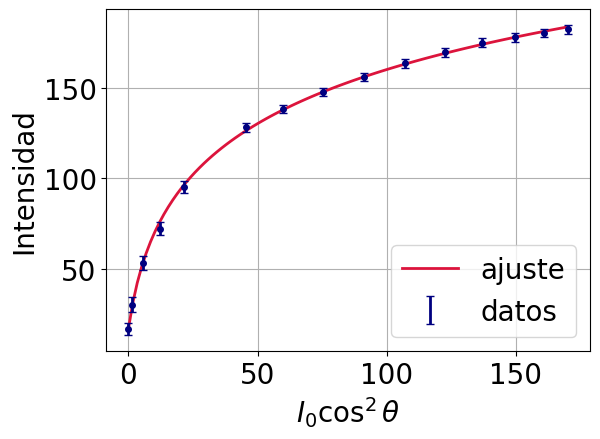

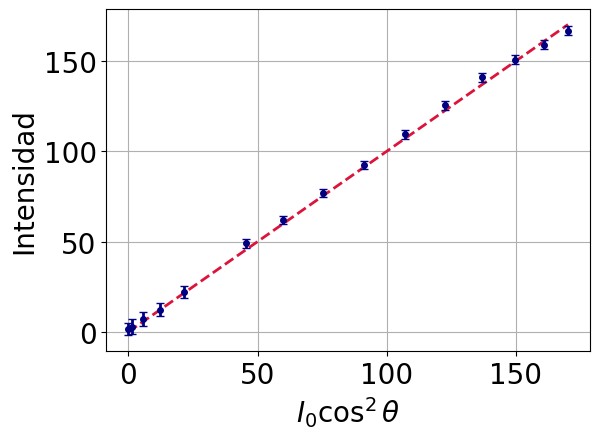

In [91]:
ang2,err_ang2,i_m2 = np.loadtxt('malus.csv',delimiter=',',unpack=True,skiprows=1)
i_m2 = np.loadtxt('Results.csv',delimiter=',',unpack=True,skiprows=1)[2]
err_i_m2 = np.loadtxt('Results.csv',delimiter=',',unpack=True,skiprows=1)[3]
order_malus2 = np.argsort(ang2)
ang2 = ang2[order_malus2]
err_ang2 = err_ang2[order_malus2]
i_m2 = i_m2[order_malus2]
err_i_m2 = err_i_m2[order_malus2]

cos2 = max(i_m2)*np.cos(np.radians(90-ang2-ang2[18]))**2
err_cos2 = np.sqrt((2*np.sin(np.radians(90-ang2+ang2[18]))*np.cos(np.radians(90-ang2+ang2[18]))*np.radians(err_ang2)*max(i_m2))**2+(np.cos(np.radians(90-ang2+ang2[18]))*2.559)**2)

cos2 = cos2[2:-5]
err_cos2 = err_cos2[2:-5]
i_m2 = i_m2[2:-5]
err_i_m2 = err_i_m2[2:-5]

log = lambda x,a,b,c,d : a*np.log(1+b*x)+c + d*(253-(a*np.log(1 + b)))

pars,cov = cf(log,cos2,i_m2,sigma=err_i_m2,absolute_sigma=True)
x_adj2 = np.linspace(0,max(cos2),100)
#x_adj2 = np.linspace(0,253,100)

print(pars)

log_nashe = lambda x : log(x,*pars)
def inversa(y):
    A,B,C,D = pars
    x = -(np.e**(-C/A-(253*D)/A)*(np.e**(C/A+(253*D)/A)-(1+B)**D*np.e**(y/A)))/B -(-(np.e**(-C/A-(253*D)/A)*(np.e**(C/A+(253*D)/A)-(1+B)**D))/B)
    return x

lineal = lambda x,a : a*x

plt.plot(x_adj2,log_nashe(x_adj2),'crimson',zorder=1,label='ajuste')
plt.scatter(cos2,i_m2,c='navy',zorder=3)
plt.errorbar(cos2,i_m2,yerr=err_i_m2,fmt='None',ecolor='navy',zorder=2,label='datos')
#plt.axhline(y=253,xmin=0,xmax=1,c='darkmagenta',ls='--')
plt.grid()
plt.xlabel(r'$I_{0}\cos^{2}{\theta}$')
plt.ylabel('Intensidad')
plt.legend()
plt.tight_layout()
plt.savefig('plots/ajuste malus.png')
plt.show()
plt.scatter(cos2,inversa(i_m2),c='navy',zorder=3)
plt.errorbar(cos2,inversa(i_m2),yerr=err_i_m2,fmt='None',ecolor='navy',zorder=2)
plt.plot(x_adj2,x_adj2,c='crimson',ls='--',zorder=1)
plt.xlabel(r'$I_{0}\cos^{2}{\theta}$')
plt.ylabel('Intensidad')
plt.grid()
plt.tight_layout()
plt.savefig('plots/malus lineal.png')

In [62]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B)

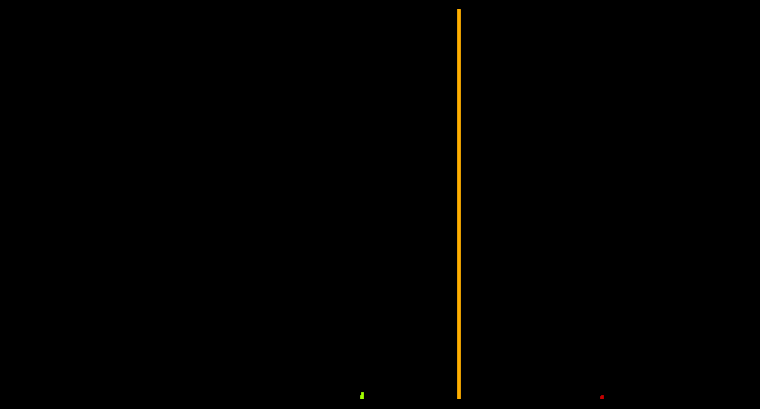

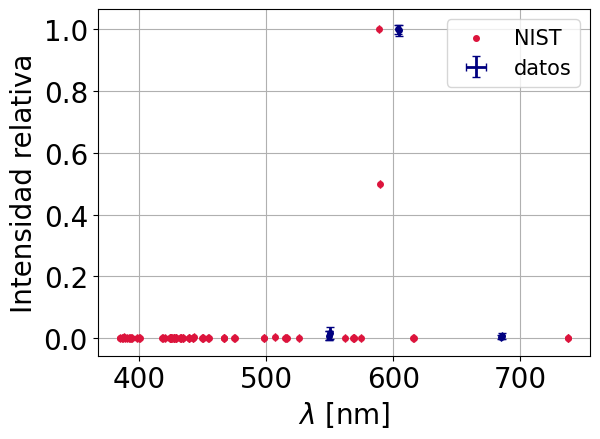

In [80]:
fuentes = pd.ExcelFile('fuentes.xlsx')
a = 1/600*10**6 # nm

df_sodio = pd.read_excel(fuentes,'sodio',usecols=[0,1,3,4])
df_sodio.iloc[:,0] = 360 - df_sodio.iloc[:,0] - df_sodio.iloc[0,0] - 25
df_sodio.iloc[:,1] = (60 - df_sodio.iloc[:,1] - df_sodio.iloc[0,1])%60
df_sodio = df_sodio[1:]
err_max_sodio = df_sodio[df_sodio['intensidad'] == df_sodio['intensidad'].max()]['err I'].values[0]
df_sodio.iloc[:,3] = np.sqrt((df_sodio.iloc[:,3]/max(df_sodio.iloc[:,2]))**2+(df_sodio.iloc[:,2]*err_max_sodio/max(df_sodio.iloc[:,2])**2)**2)
df_sodio.iloc[:,2] = inversa(df_sodio.iloc[:,2])
df_sodio.iloc[:,2] = df_sodio.iloc[:,2]/max(df_sodio.iloc[:,2])
df_sodio['lambda'] = np.sin(np.radians(df_sodio.iloc[:,0]+df_sodio.iloc[:,1]/60))*a
df_sodio['err lambda'] = np.cos(np.radians(df_sodio.iloc[:,0]+df_sodio.iloc[:,1]/60))*np.radians(1/60)

fig, ax = plt.subplots(figsize=[16/2,9/2],facecolor='k')
ax.axis('off')
ax.set_facecolor('none')

for i in range(len(df_sodio)):
    ax.axvline(x=df_sodio.iloc[i,4],ymin=0,ymax=df_sodio.iloc[i,2],c=wavelength_to_rgb(df_sodio.iloc[i,4]))
ax.axvline(x=370,ymin=0,ymax=1,c='k')
ax.axvline(x=750,ymin=0,ymax=1,c='k')
plt.savefig('plots/espectro_sodio.png')
plt.show()

nist_sodio = pd.read_csv('nist/Na I.csv')
nist_sodio.iloc[:,2] = nist_sodio.iloc[:,2]/max(nist_sodio.iloc[:,2])

plt.errorbar(df_sodio.iloc[0,4],df_sodio.iloc[0,2],yerr=df_sodio.iloc[0,3],xerr=df_sodio.iloc[0,5],fmt='None',ecolor='navy',label='datos',zorder=3)
for i in range(len(df_sodio)):
    plt.scatter(df_sodio.iloc[i,4],df_sodio.iloc[i,2],c='navy',zorder=4)
    plt.errorbar(df_sodio.iloc[i,4],df_sodio.iloc[i,2],yerr=df_sodio.iloc[i,3],xerr=df_sodio.iloc[i,5],fmt='None',ecolor='navy',zorder=3)

plt.scatter(nist_sodio.iloc[0,0],nist_sodio.iloc[0,2],c='crimson',label='NIST',zorder=2)
for i in range(len(nist_sodio)):
    plt.scatter(nist_sodio.iloc[i,0],nist_sodio.iloc[i,2],c='crimson',zorder=2)
    plt.errorbar(nist_sodio.iloc[i,0],nist_sodio.iloc[i,2],xerr=nist_sodio.iloc[i,1],fmt='None',ecolor='crimson',zorder=1)
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad relativa')
plt.legend(fontsize=15)
plt.savefig('plots/comp_sodio.png')
plt.show()

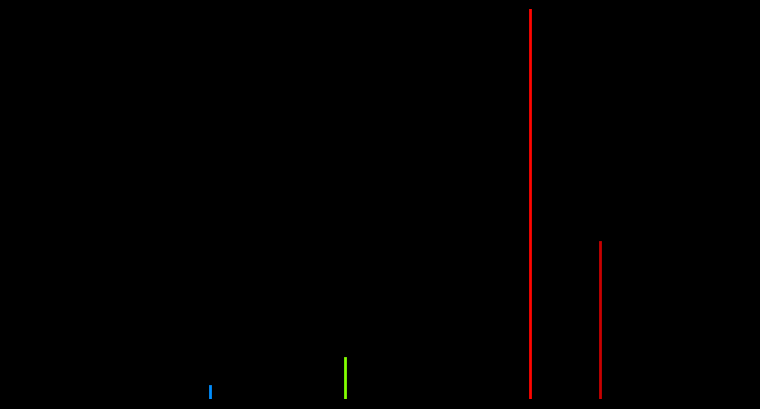

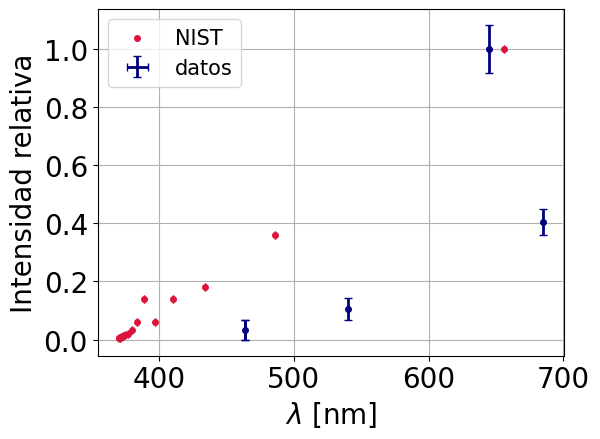

In [81]:
fuentes = pd.ExcelFile('fuentes.xlsx')
df_hidrogeno = pd.read_excel(fuentes,'hidrogeno',usecols=[0,1,3,4])
df_hidrogeno.iloc[:,0] = 360 - df_hidrogeno.iloc[:,0] - df_hidrogeno.iloc[0,0]
df_hidrogeno.iloc[:,1] = (60 - df_hidrogeno.iloc[:,1] - df_hidrogeno.iloc[0,1])%60
df_hidrogeno = df_hidrogeno[1:]
err_max_hidrogeno = df_hidrogeno[df_hidrogeno['intensidad'] == df_hidrogeno['intensidad'].max()]['err I'].values[0]
df_hidrogeno.iloc[:,3] = np.sqrt((df_hidrogeno.iloc[:,3]/max(df_hidrogeno.iloc[:,2]))**2+(df_hidrogeno.iloc[:,2]*err_max_hidrogeno/max(df_hidrogeno.iloc[:,2])**2)**2)
df_hidrogeno.iloc[:,2] = inversa(df_hidrogeno.iloc[:,2])
df_hidrogeno.iloc[:,2] = df_hidrogeno.iloc[:,2]/max(df_hidrogeno.iloc[:,2])
df_hidrogeno['lambda'] = np.sin(np.radians(df_hidrogeno.iloc[:,0]+df_hidrogeno.iloc[:,1]/60))*a
df_hidrogeno['err lambda'] = np.cos(np.radians(df_hidrogeno.iloc[:,0]+df_hidrogeno.iloc[:,1]/60))*np.radians(1/60)

fig, ax = plt.subplots(figsize=[16/2,9/2],facecolor='k')
ax.axis('off')
ax.set_facecolor('none')

for i in range(len(df_hidrogeno)):
    ax.axvline(x=df_hidrogeno.iloc[i,4],ymin=0,ymax=df_hidrogeno.iloc[i,2],c=wavelength_to_rgb(df_hidrogeno.iloc[i,4]))
ax.axvline(x=370,ymin=0,ymax=1,c='k')
ax.axvline(x=750,ymin=0,ymax=1,c='k')
plt.savefig('plots/espectro_hidrogeno.png')
plt.show()

nist_hidrogeno = pd.read_csv('nist/H.csv')
nist_hidrogeno.iloc[:,2] = nist_hidrogeno.iloc[:,2]/max(nist_hidrogeno.iloc[:,2])

plt.errorbar(df_hidrogeno.iloc[0,4],df_hidrogeno.iloc[0,2],yerr=df_hidrogeno.iloc[0,3],xerr=df_hidrogeno.iloc[0,5],fmt='None',ecolor='navy',label='datos',zorder=3)
for i in range(len(df_hidrogeno)):
    plt.scatter(df_hidrogeno.iloc[i,4],df_hidrogeno.iloc[i,2],c='navy',zorder=4)
    plt.errorbar(df_hidrogeno.iloc[i,4],df_hidrogeno.iloc[i,2],yerr=df_hidrogeno.iloc[i,3],xerr=df_hidrogeno.iloc[i,5],fmt='None',ecolor='navy',zorder=3)

plt.scatter(nist_hidrogeno.iloc[0,0],nist_hidrogeno.iloc[0,2],c='crimson',label='NIST',zorder=2)
for i in range(len(nist_hidrogeno)):
    plt.scatter(nist_hidrogeno.iloc[i,0],nist_hidrogeno.iloc[i,2],c='crimson',zorder=2)
    plt.errorbar(nist_hidrogeno.iloc[i,0],nist_hidrogeno.iloc[i,2],xerr=nist_hidrogeno.iloc[i,1],fmt='None',ecolor='crimson',zorder=1)
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad relativa')
plt.legend(fontsize=15)
plt.savefig('plots/comp_hidrogeno.png')
plt.show()

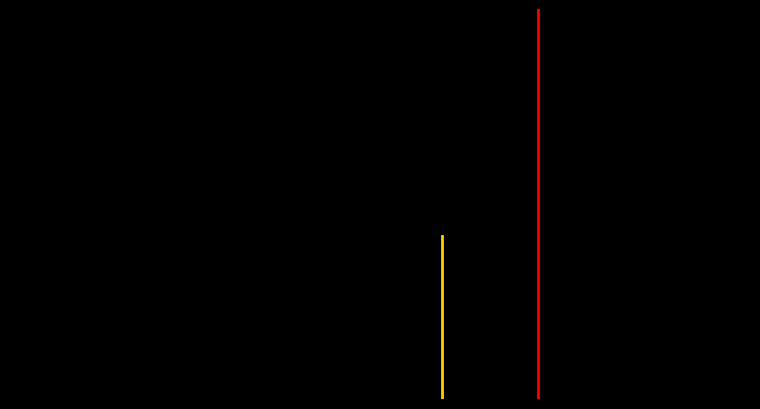

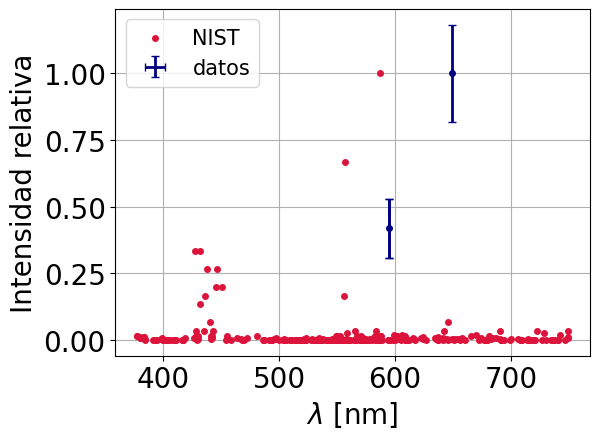

In [82]:
fuentes = pd.ExcelFile('fuentes.xlsx')
df_kripton = pd.read_excel(fuentes,'kripto',usecols=[0,1,3,4])
df_kripton.iloc[:,0] = 360 - df_kripton.iloc[:,0] - df_kripton.iloc[0,0]
df_kripton.iloc[:,1] = (60 - df_kripton.iloc[:,1] - df_kripton.iloc[0,1])%60
df_kripton = df_kripton[1:]
err_max_kripton = df_kripton[df_kripton['intensidad'] == df_kripton['intensidad'].max()]['err I'].values[0]
df_kripton.iloc[:,3] = np.sqrt((df_kripton.iloc[:,3]/max(df_kripton.iloc[:,2]))**2+(df_kripton.iloc[:,2]*err_max_kripton/max(df_kripton.iloc[:,2])**2)**2)
df_kripton.iloc[:,2] = inversa(df_kripton.iloc[:,2])
df_kripton.iloc[:,2] = df_kripton.iloc[:,2]/max(df_kripton.iloc[:,2])
df_kripton['lambda'] = np.sin(np.radians(df_kripton.iloc[:,0]+df_kripton.iloc[:,1]/60))*a
df_kripton['err lambda'] = np.cos(np.radians(df_kripton.iloc[:,0]+df_kripton.iloc[:,1]/60))*np.radians(1/60)

fig, ax = plt.subplots(figsize=[16/2,9/2],facecolor='k')
ax.axis('off')
ax.set_facecolor('none')

for i in range(len(df_kripton)):
    ax.axvline(x=df_kripton.iloc[i,4],ymin=0,ymax=df_kripton.iloc[i,2],c=wavelength_to_rgb(df_kripton.iloc[i,4]))
ax.axvline(x=370,ymin=0,ymax=1,c='k')
ax.axvline(x=750,ymin=0,ymax=1,c='k')
plt.savefig('plots/espectro_kripton.png')
plt.show()

nist_kripton = pd.read_csv('nist/Kr I.csv')
nist_kripton.iloc[:,1] = nist_kripton.iloc[:,1]/max(nist_kripton.iloc[:,1])

plt.errorbar(df_kripton.iloc[0,4],df_kripton.iloc[0,2],yerr=df_kripton.iloc[0,3],xerr=df_kripton.iloc[0,5],fmt='None',ecolor='navy',label='datos',zorder=1)
for i in range(len(df_kripton)):
    plt.scatter(df_kripton.iloc[i,4],df_kripton.iloc[i,2],c='navy',zorder=2)
    plt.errorbar(df_kripton.iloc[i,4],df_kripton.iloc[i,2],yerr=df_kripton.iloc[i,3],xerr=df_kripton.iloc[i,5],fmt='None',ecolor='navy',zorder=1)

plt.scatter(nist_kripton.iloc[0,0],nist_kripton.iloc[0,1],c='crimson',label='NIST',zorder=2)
for i in range(len(nist_kripton)):
    plt.scatter(nist_kripton.iloc[i,0],nist_kripton.iloc[i,1],c='crimson',zorder=2)
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad relativa')
plt.legend(fontsize=15)
plt.savefig('plots/comp_kripton.png')
plt.show()

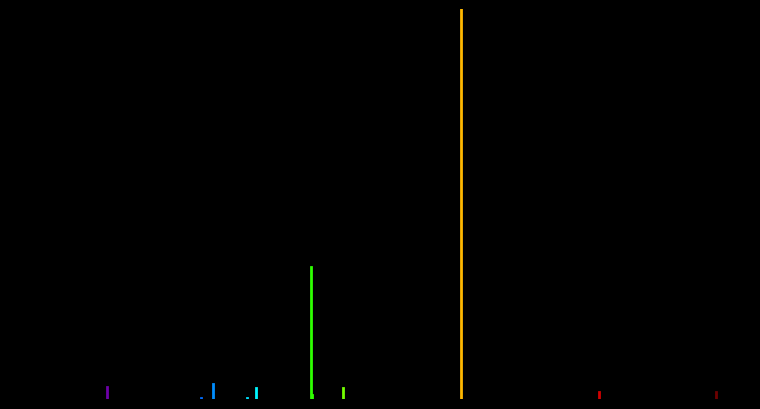

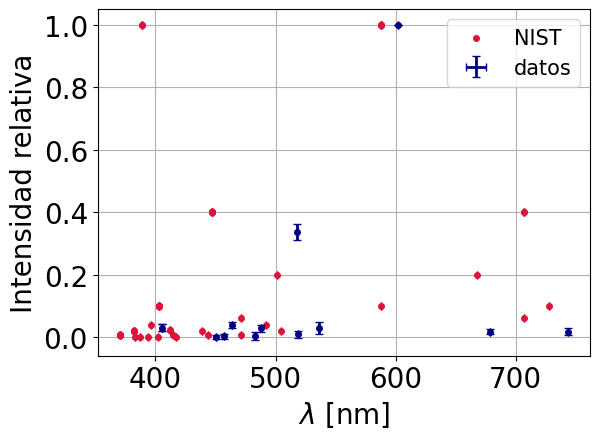

In [83]:
fuentes = pd.ExcelFile('fuentes.xlsx')
df_helio = pd.read_excel(fuentes,'helio',usecols=[0,1,3,4])
df_helio.iloc[:,0] = 360 - df_helio.iloc[:,0] - df_helio.iloc[0,0]
df_helio.iloc[:,1] = (60 - df_helio.iloc[:,1] - df_helio.iloc[0,1])%60
df_helio = df_helio[1:]
err_max_helio = df_helio[df_helio['intensidad'] == df_helio['intensidad'].max()]['err I'].values[0]
df_helio.iloc[:,3] = np.sqrt((df_helio.iloc[:,3]/max(df_helio.iloc[:,2]))**2+(df_helio.iloc[:,2]*err_max_helio/max(df_helio.iloc[:,2])**2)**2)
df_helio.iloc[:,2] = inversa(df_helio.iloc[:,2])
df_helio.iloc[:,2] = df_helio.iloc[:,2]/max(df_helio.iloc[:,2])
df_helio['lambda'] = np.sin(np.radians(df_helio.iloc[:,0]+df_helio.iloc[:,1]/60))*a
df_helio['err lambda'] = np.cos(np.radians(df_helio.iloc[:,0]+df_helio.iloc[:,1]/60))*np.radians(1/60)

fig, ax = plt.subplots(figsize=[16/2,9/2],facecolor='k')
ax.axis('off')
ax.set_facecolor('none')

for i in range(len(df_helio)):
    ax.axvline(x=df_helio.iloc[i,4],ymin=0,ymax=df_helio.iloc[i,2],c=wavelength_to_rgb(df_helio.iloc[i,4]))
ax.axvline(x=370,ymin=0,ymax=1,c='k')
ax.axvline(x=750,ymin=0,ymax=1,c='k')
plt.savefig('plots/espectro_helio.png')
plt.show()

nist_helio = pd.read_csv('nist/He I.csv')
nist_helio.iloc[:,2] = nist_helio.iloc[:,2]/max(nist_helio.iloc[:,2])

plt.errorbar(df_helio.iloc[0,4],df_helio.iloc[0,2],yerr=df_helio.iloc[0,3],xerr=df_helio.iloc[0,5],fmt='None',ecolor='navy',label='datos',zorder=3)
for i in range(len(df_helio)):
    plt.scatter(df_helio.iloc[i,4],df_helio.iloc[i,2],c='navy',zorder=4)
    plt.errorbar(df_helio.iloc[i,4],df_helio.iloc[i,2],yerr=df_helio.iloc[i,3],xerr=df_helio.iloc[i,5],fmt='None',ecolor='navy',zorder=3)

plt.scatter(nist_helio.iloc[0,0],nist_helio.iloc[0,2],c='crimson',label='NIST',zorder=2)
for i in range(len(nist_helio)):
    plt.scatter(nist_helio.iloc[i,0],nist_helio.iloc[i,2],c='crimson',zorder=2)
    plt.errorbar(nist_helio.iloc[i,0],nist_helio.iloc[i,2],xerr=nist_helio.iloc[i,1],fmt='None',ecolor='crimson',zorder=1)
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad relativa')
plt.legend(fontsize=15)
plt.savefig('plots/comp_helio.png')
plt.show()

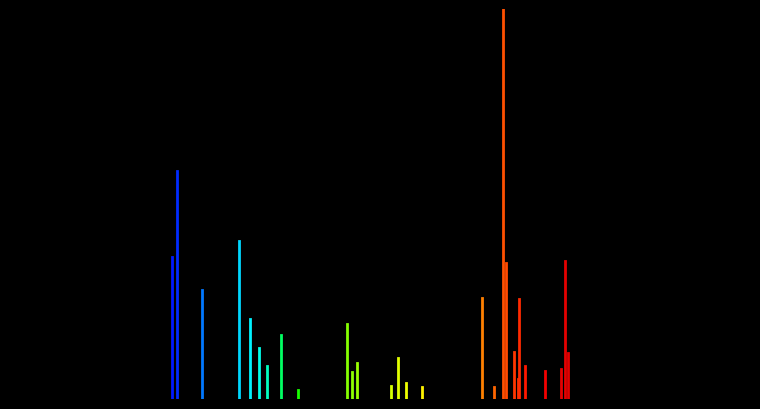

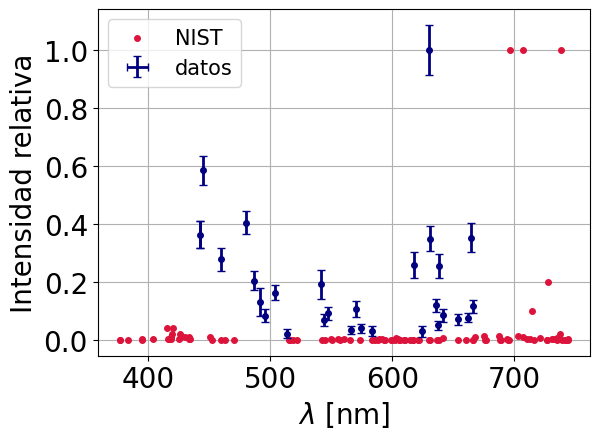

In [84]:
fuentes = pd.ExcelFile('fuentes.xlsx')
df_argon = pd.read_excel(fuentes,'argon',usecols=[0,1,3,4])
df_argon.iloc[:,0] = 360 - df_argon.iloc[:,0] - df_argon.iloc[0,0]
df_argon.iloc[:,1] = (60 - df_argon.iloc[:,1] - df_argon.iloc[0,1])%60
df_argon = df_argon[1:]
err_max_argon = df_argon[df_argon['intensidad'] == df_argon['intensidad'].max()]['err I'].values[0]
df_argon.iloc[:,3] = np.sqrt((df_argon.iloc[:,3]/max(df_argon.iloc[:,2]))**2+(df_argon.iloc[:,2]*err_max_argon/max(df_argon.iloc[:,2])**2)**2)
df_argon.iloc[:,2] = inversa(df_argon.iloc[:,2])
df_argon.iloc[:,2] = df_argon.iloc[:,2]/max(df_argon.iloc[:,2])
df_argon['lambda'] = np.sin(np.radians(df_argon.iloc[:,0]+df_argon.iloc[:,1]/60))*a
df_argon['err lambda'] = np.cos(np.radians(df_argon.iloc[:,0]+df_argon.iloc[:,1]/60))*np.radians(1/60)

fig, ax = plt.subplots(figsize=[16/2,9/2],facecolor='k')
ax.axis('off')
ax.set_facecolor('none')

for i in range(len(df_argon)):
    ax.axvline(x=df_argon.iloc[i,4],ymin=0,ymax=df_argon.iloc[i,2],c=wavelength_to_rgb(df_argon.iloc[i,4]))
ax.axvline(x=370,ymin=0,ymax=1,c='k')
ax.axvline(x=750,ymin=0,ymax=1,c='k')
plt.savefig('plots/espectro_argon.png')
plt.show()

nist_argon = pd.read_csv('nist/Ar I.csv')
nist_argon.iloc[:,1] = nist_argon.iloc[:,1]/max(nist_argon.iloc[:,1])

plt.errorbar(df_argon.iloc[0,4],df_argon.iloc[0,2],yerr=df_argon.iloc[0,3],xerr=df_argon.iloc[0,5],fmt='None',ecolor='navy',label='datos',zorder=3)
for i in range(len(df_argon)):
    plt.scatter(df_argon.iloc[i,4],df_argon.iloc[i,2],c='navy',zorder=4)
    plt.errorbar(df_argon.iloc[i,4],df_argon.iloc[i,2],yerr=df_argon.iloc[i,3],xerr=df_argon.iloc[i,5],fmt='None',ecolor='navy',zorder=3)

plt.scatter(nist_argon.iloc[0,0],nist_argon.iloc[0,1],c='crimson',label='NIST',zorder=2)
for i in range(len(nist_argon)):
    plt.scatter(nist_argon.iloc[i,0],nist_argon.iloc[i,1],c='crimson',zorder=2)
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad relativa')
plt.legend(fontsize=15)
plt.savefig('plots/comp_argon.png')
plt.show()

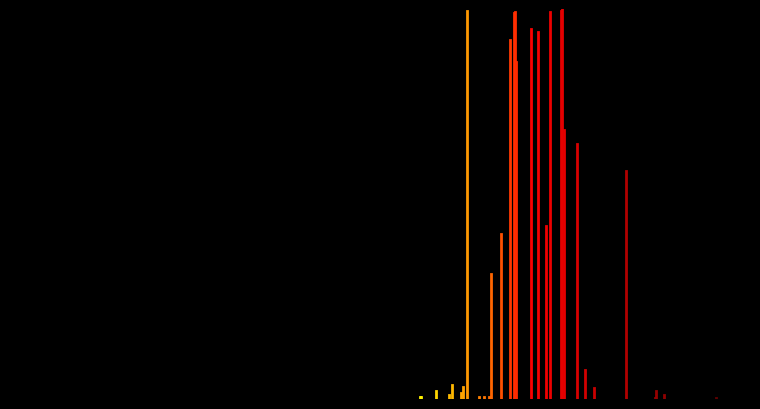

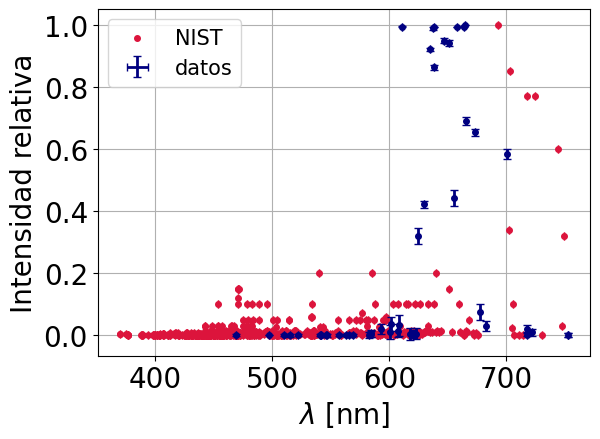

In [85]:
fuentes = pd.ExcelFile('fuentes.xlsx')
df_neon = pd.read_excel(fuentes,'neon',usecols=[0,1,3,4])
df_neon.iloc[:,0] = 360 - df_neon.iloc[:,0] - df_neon.iloc[0,0]
df_neon.iloc[:,1] = (60 - df_neon.iloc[:,1] - df_neon.iloc[0,1])%60
df_neon = df_neon[1:]
err_max_neon = df_neon[df_neon['intensidad'] == df_neon['intensidad'].max()]['err I'].values[0]
df_neon.iloc[:,3] = np.sqrt((df_neon.iloc[:,3]/max(df_neon.iloc[:,2]))**2+(df_neon.iloc[:,2]*err_max_neon/max(df_neon.iloc[:,2])**2)**2)
df_neon.iloc[:,2] = inversa(df_neon.iloc[:,2])
df_neon.iloc[:,2] = df_neon.iloc[:,2]/max(df_neon.iloc[:,2])
df_neon['lambda'] = np.sin(np.radians(df_neon.iloc[:,0]+df_neon.iloc[:,1]/60))*a
df_neon['err lambda'] = np.cos(np.radians(df_neon.iloc[:,0]+df_neon.iloc[:,1]/60))*np.radians(1/60)

fig, ax = plt.subplots(figsize=[16/2,9/2],facecolor='k')
ax.axis('off')
ax.set_facecolor('none')

for i in range(len(df_neon)):
    ax.axvline(x=df_neon.iloc[i,4],ymin=0,ymax=df_neon.iloc[i,2],c=wavelength_to_rgb(df_neon.iloc[i,4]))
ax.axvline(x=370,ymin=0,ymax=1,c='k')
ax.axvline(x=750,ymin=0,ymax=1,c='k')
plt.savefig('plots/espectro_neon.png')
plt.show()

nist_neon = pd.read_csv('nist/Ne I.csv')
nist_neon.iloc[:,2] = nist_neon.iloc[:,2]/max(nist_neon.iloc[:,2])

plt.errorbar(df_neon.iloc[0,4],df_neon.iloc[0,2],yerr=df_neon.iloc[0,3],xerr=df_neon.iloc[0,5],fmt='None',ecolor='navy',label='datos',zorder=3)
for i in range(len(df_neon)):
    plt.scatter(df_neon.iloc[i,4],df_neon.iloc[i,2],c='navy',zorder=4)
    plt.errorbar(df_neon.iloc[i,4],df_neon.iloc[i,2],yerr=df_neon.iloc[i,3],xerr=df_neon.iloc[i,5],fmt='None',ecolor='navy',zorder=3)

plt.scatter(nist_neon.iloc[0,0],nist_neon.iloc[0,2],c='crimson',label='NIST',zorder=2)
for i in range(len(nist_neon)):
    plt.scatter(nist_neon.iloc[i,0],nist_neon.iloc[i,2],c='crimson',zorder=2)
    plt.errorbar(nist_neon.iloc[i,0],nist_neon.iloc[i,2],xerr=nist_neon.iloc[i,1],fmt='None',ecolor='crimson',zorder=1)
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad relativa')
plt.legend(fontsize=15)
plt.savefig('plots/comp_neon.png')
plt.show()